In [7]:
import xrdtools

fpath = r'C:\OneDrive - UNSW\Experiments 2019\Xray\VG180301\VG180301_BFO_001_rocking_curve.ras'

data = xrdtools.read_xrdml(fpath)

File "C:\OneDrive - UNSW\Experiments 2019\Xray\VG180301\VG180301_BFO_001_rocking_curve.ras" does not exist.


ValueError: This is not a valid filename.

In [1]:
def ras_file( file ):
    # Read RAS data to object
    rasFile = xu.io.rigaku_ras.RASFile(file)
        
    self.scanaxis = rasFile.scans.scan_axis
    self.stepSize = rasFile.scans.meas_step
    self.measureSpeed= rasFile.scans.meas_speed
    self.dataCount = rasFile.scans.length
    # Read raw motor position and intensity data to large 1D arrays

    ax1, data = xu.io.getras_scan(rasFile.filename+'%s', '', self.scanaxis)

    npinte = np.array(data['int'])
    
    
    # Read omega data from motor positions at the start of each 2theta-Omega scan
    om = [rasFile.scans[i].init_mopo['Omega'] for i in range(0, len(rasFile.scans))]
    # Convert 2theta-omega data to 1D array
    
    return (np.transpose(omga), np.transpose(tt), np.transpose(intensities))

In [3]:
import xrayutilities as xu
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import filedialog
import os


root = tk.Tk()
root.withdraw()
filepath = filedialog.askopenfilename()
filename = os.path.basename(filepath)

#file = r'C:\Users\olive\OneDrive - UNSW\Experiments 2019\Xrays\VG180301\VG180301_rockingCurve_alignment.ras'
rasFile = xu.io.rigaku_ras.RASFile(filepath)
ax1, data = xu.io.getras_scan(rasFile.filename+'%s', '', rasFile.scans[0].scan_axis)
%matplotlib widget
fig, ax = plt.subplots()
#Q = 4 * np.pi/1.54 * np.sin(np.radians(ax1/2))

ax.plot(data['TwoThetaOmega'], data['int']*data['att'], label='Data', color = 'black')
ax.set_xlabel( '2Theta (degrees)')
ax.set_ylabel( 'Intensity (a.u.)')
ax.set_yscale('log')
#ax.set_yscale('log')



FigureCanvasNbAgg()

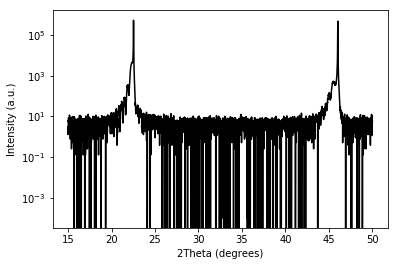

In [ ]:
params, sd_params, itlim = xu.math.fit.gauss_fit(ax1, data['int']*data['att'], iparams=[], maxit=300)

ax.plot(ax1, xu.math.Gauss1d(ax1, *params), label='Gaussian fit')
ax.legend()
fwhm = xu.math.fit.fwhm_exp(ax1, xu.math.Gauss1d(ax1, *params))
print('FWHM = ' + str(fwhm))

In [8]:
root = tk.Tk()
root.withdraw()
filepath = filedialog.askopenfilename()
filename = os.path.basename(filepath)

rasFile = xu.io.rigaku_ras.RASFile(filepath)
tt_om, data = xu.io.getras_scan(rasFile.filename+'%s', '', rasFile.scans[0].scan_axis)

%matplotlib widget
fig, ax = plt.subplots()
inte = data['int']*data['att']
ax.plot(tt_om, inte)
ax.set_xlabel('2theta-Omega (degrees)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_yscale('log')
ax.set_title('Thick T-phase')

FigureCanvasNbAgg()

Text(0.5, 1.0, 'Thick T-phase')